In [1]:
import pandas as pd
import numpy as np
import re
print(pd.__version__)
print(np.__version__)

0.23.4
1.15.4


In [2]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
petitions = pd.read_csv('petition.csv',
                        parse_dates=['start', 'end'])
# 데이터의 크기가 어느정도인지 본다.
petitions.shape

(377756, 8)

In [3]:
petitions.describe()

,article_id,answered,votes
count,377756.000000,377756.000000,3.777560e+05
mean,239703.455924,0.000077,1.514069e+02
std,146382.863480,0.008761,4.842551e+03
min,21.000000,0.000000,0.000000e+00
25%,108933.750000,0.000000,1.000000e+00
50%,237637.000000,0.000000,5.000000e+00
75%,367937.250000,0.000000,1.500000e+01
max,492043.000000,1.000000,1.192049e+06


In [4]:
df=petitions
df.describe()

,article_id,answered,votes
count,377756.000000,377756.000000,3.777560e+05
mean,239703.455924,0.000077,1.514069e+02
std,146382.863480,0.008761,4.842551e+03
min,21.000000,0.000000,0.000000e+00
25%,108933.750000,0.000000,1.000000e+00
50%,237637.000000,0.000000,5.000000e+00
75%,367937.250000,0.000000,1.500000e+01
max,492043.000000,1.000000,1.192049e+06


In [5]:
df.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [6]:
df.shape

(377756, 8)

In [7]:
p = r'.*(대학|취업).*'
care = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

(22886, 8)

In [8]:
care.head()

,article_id,start,end,answered,votes,category,title,content
5,26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...
8,29,2017-08-19,2017-09-18,0,3,미래,문재인 정부는 왜 공무원개혁엔 무관심한가?,살충제 계란 사건으로 국민들을 불안케 하고 있다.\n원인이 무엇인가? 살충제를 뿌린...
10,31,2017-08-19,2017-11-17,0,0,보건복지,<담배 제조 및 매매금지 법안>을 제정해 주시길 부탁드립니다.,안녕하세요 대통령님\n금연 관련 정책들이 강화되고 있지만 여전히 흡연자의 수는 줄어...
12,33,2017-08-19,2017-11-17,0,15,인권/성평등,납득할 수 있는 장애 재판정을 받고 싶습니다.,안녕하십니까? 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다. 합창 시...
23,45,2017-08-19,2017-11-17,0,0,육아/교육,초등학교 교사 임용 시험 관련 해결방안,초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\n1지망 2...


In [9]:
type(care)

pandas.core.frame.DataFrame

In [10]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 23

In [11]:
sample_title = care.loc[sample_index, 'title']
sample_title

'초등학교 교사 임용 시험 관련 해결방안'

In [12]:
type(sample_title)

str

In [13]:
sample_content = care['content'][sample_index]
sample_content

'초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\\n1지망 2지망 3지망으로 근무하고 싶은 지역을 선택해서 성적순으로 배정했으면 합니다.\\n그리고 해당 대학이 소재한 교육청에서 임용 시험 응시할 때 주어지는 가산점도 없애야합니다.\\n이미 수능 시험 점수에 맞춰서 해당 대학에 합격했으므로 수능 점수의 유효성은 끝이 났습니다.\\n전국 단위의 시험을 봐서 과목별 원점수,표준변환점수,백분위를 성적표에 공지해서\\n예비 교사들이 본인 성적에 맞게 근무지역을 선택하는 것입니다.\\n만약 응시자가 성적이 높다면 1지망 지역에 배정이 될테고\\n점수가 낮으면 2지망 혹은 3지망으로 밀리거나 임용 탈락이 되겠지요\\n배정 받은 지역에서 근무하면서 해당 지역이 마음에 들면 계속 근무하고\\n해당 지역이 마음에 들지 않으면 다음에 다시 시험을 봐서 근무지를 옮길 수 있도록 하는 것입니다.'

In [14]:
#pip install soynlp

In [15]:
# 토큰화
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [16]:
tokened_title = tokenizer.tokenize(sample_title) # split과 동일함
tokened_title

['초등학교', '교사', '임용', '시험', '관련', '해결방안']

In [17]:
type(tokened_title)

list

In [18]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:20]

['초등학교',
 '교사',
 '임용',
 '시험을',
 '수능',
 '시험',
 '처럼',
 '전국',
 '단위로',
 '실시하고난',
 '후에',
 '\\',
 'n',
 '1',
 '지망',
 '2',
 '지망',
 '3',
 '지망으로',
 '근무하고']

In [19]:
print(len(tokened_title))
print(len(tokened_content))

6
133


In [20]:
# 텍스트 데이터 전처리
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [21]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = care['content'].apply(preprocessing)
sentences.head()

Wall time: 359 ms


5     청원인  왕 기 운 서울 도봉구 창동 삼성아파트 101-1103호 청원취지 보건복지...
8     살충제 계란 사건으로 국민들을 불안케 하고 있다. 원인이 무엇인가? 살충제를 뿌린 ...
10    안녕하세요 대통령님 금연 관련 정책들이 강화되고 있지만 여전히 흡연자의 수는 줄어들...
12    안녕하십니까? 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다. 합창 시...
23    초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에 1지망 2지...
Name: content, dtype: object

In [22]:
type(sentences)

pandas.core.series.Series

In [23]:
# 토큰화

In [24]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 1min 30s


5     [청원인, 왕, 기, 운, 서울, 도봉구, 창동, 삼성아파트, 101, -1103,...
8     [살충제, 계란, 사건으로, 국민들을, 불안케, 하고, 있다, ., 원인이, 무엇인...
10    [안녕하세요, 대통령님, 금연, 관련, 정책들이, 강화되고, 있지만, 여전히, 흡연...
Name: content, dtype: object

In [25]:
tokens[sample_index][:10]

['초등학교', '교사', '임용', '시험을', '수능', '시험', '처럼', '전국', '단위로', '실시하고난']

In [26]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm
fontpath = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [27]:
#pip install wordcloud

In [28]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가',
                '그럼', '이런', '저런', '합니다',
                '많은', '많이', '정말', '너무','현재','또한','다시','지금'
               ,'이렇게','물론','그런','아닌','000원','000명','000만원'] 

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

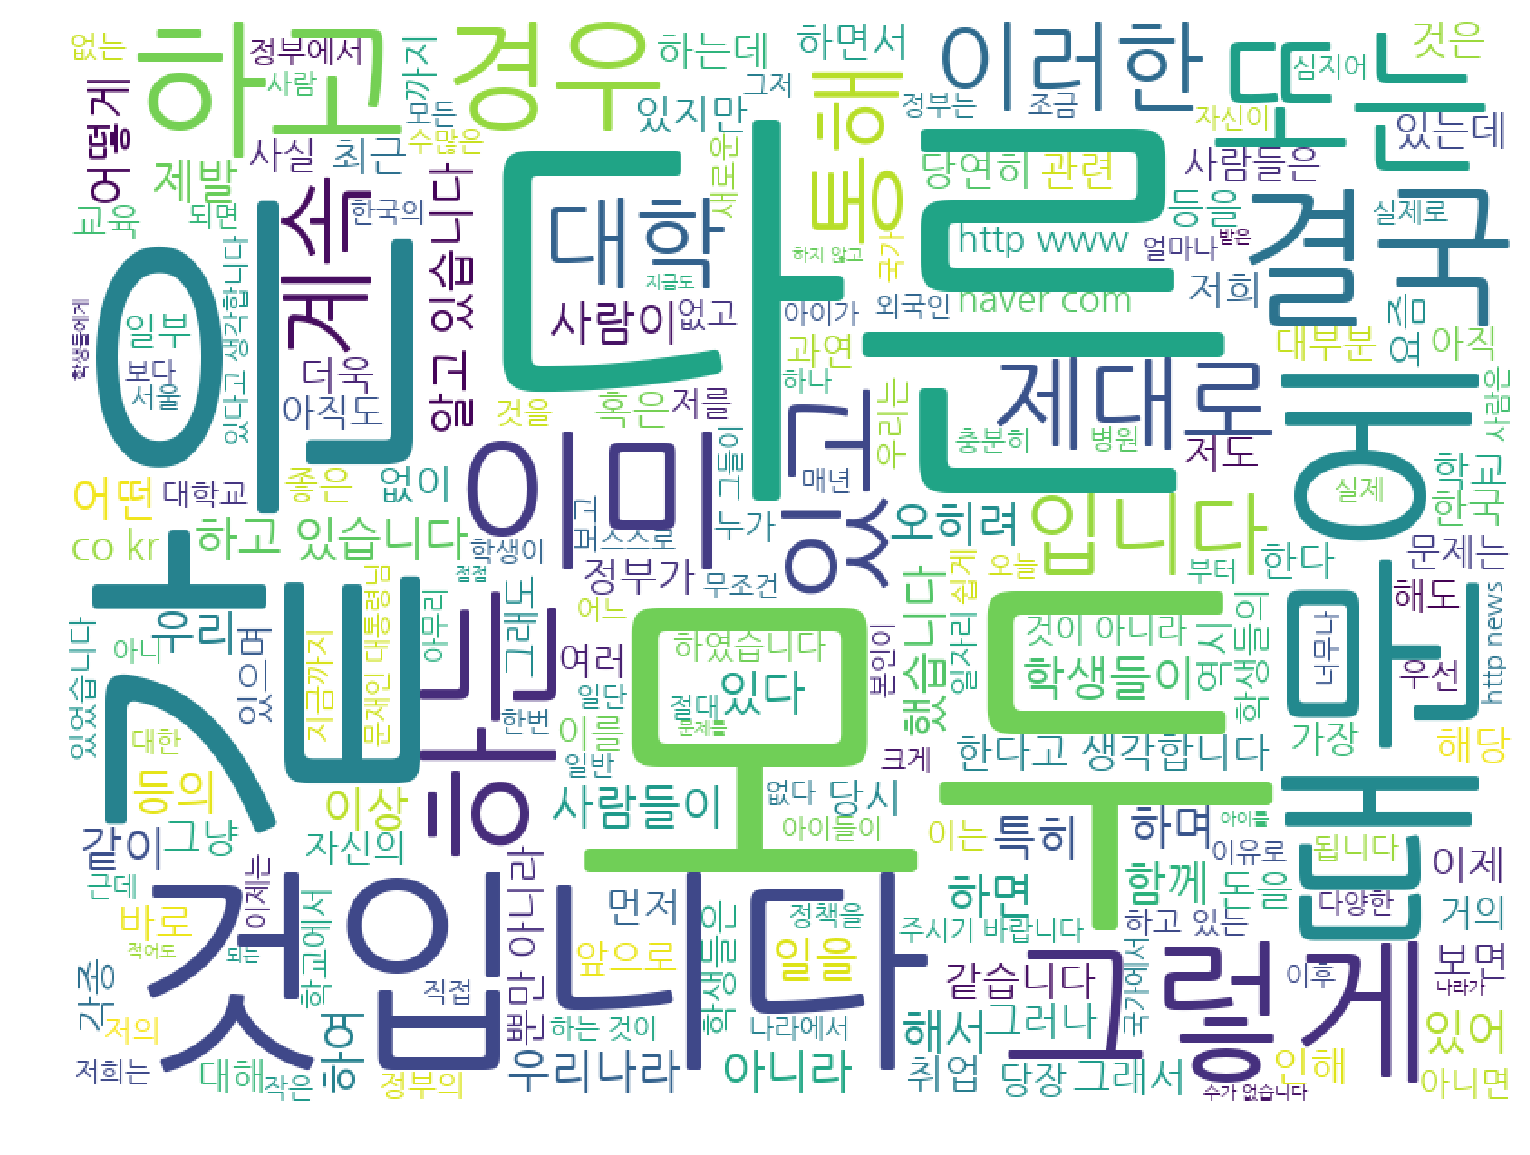

Wall time: 1min 48s


In [30]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences)) # 명사뿐만 아니라 모든 형태 단어 출력

In [31]:
from soynlp.noun import LRNounExtractor

In [32]:
noun_extractor = LRNounExtractor(verbose=True)

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded


In [ ]:
noun_extractor
noun_extractor.train(sentences)

In [ ]:
nouns = noun_extractor.extract()

In [ ]:
# 추출된 명사를 찍어봅니다.

In [ ]:
displayWordCloud(' '.join(nouns))

In [ ]:
# vote수 별로 자료들이 얼마나 있는지 체크

In [12]:
import matplotlib.pyplot as plt

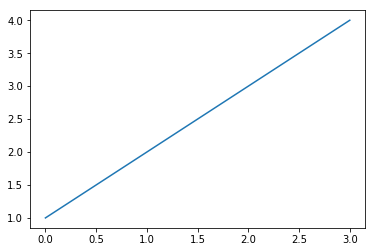

In [13]:
plt.plot([1,2,3,4])

In [14]:
x=range(0,10000)

In [15]:
y=[(petitions.loc[(petitions['votes'] == v)]).shape[0] for v in x]

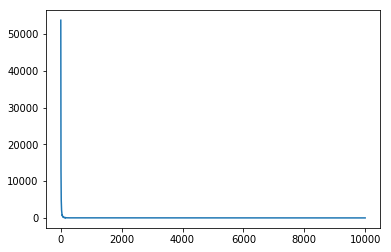

In [16]:
plt.plot(x,y)

In [26]:
x=range(0,60)

In [27]:
y=[(petitions.loc[(petitions['votes'] == v)]).shape[0] for v in x]

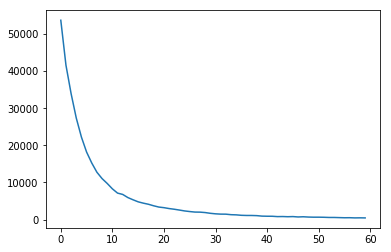

In [28]:
plt.plot(x,y)

In [29]:
type((petitions.loc[(petitions['votes'] == 0)]))

pandas.core.frame.DataFrame

In [100]:
petitions.shape

(377756, 8)

In [67]:
(petitions.loc[(petitions['votes'] == 0)]).shape

(53708, 8)

In [68]:
(petitions.loc[(petitions['votes'] == 1)]).shape

(41609, 8)

In [69]:
(petitions.loc[(petitions['votes'] == 2)]).shape

(33925, 8)

In [70]:
(petitions.loc[(petitions['votes'] == 3)]).shape

(27363, 8)

In [71]:
(petitions.loc[(petitions['votes'] == 4)]).shape

(22228, 8)

In [75]:
(petitions.loc[(petitions['votes'] == 5)]).shape

(18202, 8)

In [78]:
(petitions.loc[(petitions['votes'] < 6)]).shape[0]

197035

In [104]:
(petitions.loc[(petitions['votes'] < 21)]).shape

(303037, 8)

In [4]:
(petitions.loc[(petitions['votes'] > 100)]).shape

(17709, 8)

In [ ]:
(petitions.loc[(petitions['votes'] > 1)&(petitions['votes'] < 3)]).shape

In [52]:
(petitions.loc[(petitions['votes'] > 30)&(petitions['votes'] < 50)]).shape

(18839, 8)

In [44]:
(petitions.loc[(petitions['votes'] > 500)&(petitions['votes'] < 1000)]).shape

(1841, 8)

In [45]:
(petitions.loc[(petitions['votes'] > 1000)&(petitions['votes'] < 5000)]).shape

(2228, 8)